### Contents:

1. Import libraries
2. Import file 'customers_ords_prods.pkl'
3. Creating a “Region” column based on the “State” column 
4. Determining whether there's a difference in spending habits b/w US regions
5. Exclusion flag for low-activity customers
6. Customer profiling
7. Summarizing findings and analysis

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import file 'customers_ords_prods.pkl'

In [2]:
df = pd.read_pickle('customers_ords_prods.pkl')

In [3]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,...,spending_flag,Order_freq_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,40.0,382,29.0,1.0,15.0,23.0,10070,1.0,Organic 1% Low Fat Milk,84.0,...,Low spender,Frequent customer,Male,New Jersey,21,7/28/2019,2,living with parents and siblings,87994,both
1,116744.0,382,23.0,4.0,17.0,8.0,10070,3.0,Organic 1% Low Fat Milk,84.0,...,Low spender,Frequent customer,Male,New Jersey,21,7/28/2019,2,living with parents and siblings,87994,both
2,120295.0,382,27.0,0.0,8.0,13.0,10070,2.0,Organic 1% Low Fat Milk,84.0,...,Low spender,Frequent customer,Male,New Jersey,21,7/28/2019,2,living with parents and siblings,87994,both
3,247775.0,382,14.0,2.0,15.0,8.0,10070,2.0,Organic 1% Low Fat Milk,84.0,...,Low spender,Frequent customer,Male,New Jersey,21,7/28/2019,2,living with parents and siblings,87994,both
4,405284.0,382,15.0,1.0,11.0,6.0,10070,1.0,Organic 1% Low Fat Milk,84.0,...,Low spender,Frequent customer,Male,New Jersey,21,7/28/2019,2,living with parents and siblings,87994,both


In [4]:
print(df.columns.tolist())

['order_id', 'user_id', 'order_number', 'order_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'product_name', 'aisle_id', 'department_id', 'prices', 'busiest_day', 'busiest_days_of_week', 'busiest_period_of_day', 'loyalty_flag', 'avg_order', 'spending_flag', 'Order_freq_flag', 'gender', 'state', 'age', 'date_joined', 'number_of_dependants', 'marital_status', 'income', '_merge']


#### Q2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The customers dataframe, before merging had names of the customers that were deleted so there are no security implications. However, few details like State, age, gender, marital status and number of dependents combined can potentially be sensitive information. Although seperately they cannot be considered PII data. 

## Creating a “Region” column based on the “State” column 

In [5]:
df.loc[df['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'New York', 'New Jersey', 'Pennsylvania', 'Rhode Island', 'Connepcticut']), 'region'] = 'R1 - Northeast'

In [6]:
df.loc[df['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'R2 - Midwest'

In [7]:
df.loc[df['state'].isin(['Delaware', 'Maryland', 'Virginia', 'District of Columbia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'R3 - South'

In [8]:
df.loc[df['state'].isin(['Idaho', 'Montana', 'Nevada', 'Wyoming', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'R4 - West'

In [9]:
df['region'].value_counts()

R3 - South        10801982
R4 - West          8300617
R2 - Midwest       7604016
R1 - Northeast     5104850
Name: region, dtype: int64

All the regions total up to the total rows of the dataset. 

## Determining whether there's a difference in spending habits b/w US regions

In [10]:
df[['region', 'spending_flag']]

,region,spending_flag
0,R1 - Northeast,Low spender
1,R1 - Northeast,Low spender
2,R1 - Northeast,Low spender
3,R1 - Northeast,Low spender
4,R1 - Northeast,Low spender
...,...,...
32435054,R2 - Midwest,Low spender
32435055,R3 - South,Low spender
32435056,R3 - South,Low spender
32435057,R3 - South,Low spender


In [11]:
df_spending = df.groupby(['region', 'spending_flag']).agg({'spending_flag': ['count']}).reset_index()

In [12]:
df_spending.head(10)

region spending_flag          
                                    count
0  R1 - Northeast  High spender     95943
1  R1 - Northeast   Low spender   5008907
2    R2 - Midwest  High spender    156084
3    R2 - Midwest   Low spender   7447932
4      R3 - South  High spender    209878
5      R3 - South   Low spender  10592104
6       R4 - West  High spender    160440
7       R4 - West   Low spender   8140177

Most of the high spenders and low spenders are in Region 3 which is the South of the US.

## Exclusion flag for low-activity customers

In [13]:
# Create a separate column of max_order, which means the maximum number of orders a customer has placed 
df['max_order'] = df.groupby(['user_id'])['order_number'].transform(np.max)

In [14]:
# Making another column 'exclusion_flag' where the customers are categorised as high or low activity customers based on the number of orders
df.loc[df['max_order'] < 5, 'exclusion_flag'] = 'low activity customers'
df.loc[df['max_order'] >= 5, 'exclusion_flag'] = 'high activity customers'

In [15]:
df['exclusion_flag'].value_counts()

high activity customers    30993489
low activity customers      1441570
Name: exclusion_flag, dtype: int64

### Subset of high activity customers

In [16]:
df_high_act_customers = df.loc[df['exclusion_flag'] == 'high activity customers']

In [17]:
df_high_act_customers.shape

(30993489, 30)

The above row count of df_high_act_customers is same as the above row count of high activity customers in df dataframe which shows that in the new dataframe low activity customers have been excluded.

### Export df_high_act_customers in pkl

In [18]:
df_high_act_customers.to_pickle('df_high_act_customers.pkl')

## Customer profiling

I will use the df_high_act_customers dataframe since I am only interested in understanding trends among customers that have high activity and therefore generate high revenue

In [19]:
df_high_act_customers['marital_status'].value_counts()

married                             21763585
single                               5099384
divorced/widowed                     2647799
living with parents and siblings     1482721
Name: marital_status, dtype: int64

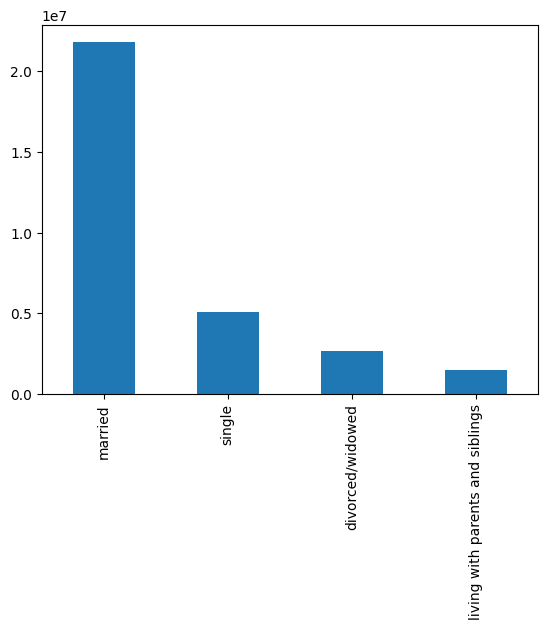

In [20]:
# Creating a bar chart to understand the family/marital status of the customers 
bar_marital_status = df_high_act_customers['marital_status'].value_counts().plot.bar()

The major proportion of customers are married, while the ones who are living with parents or siblings are the lowest in number.

In [21]:
df_high_act_customers['income'].describe()

count    3.099349e+07
mean     9.967349e+04
std      4.313999e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

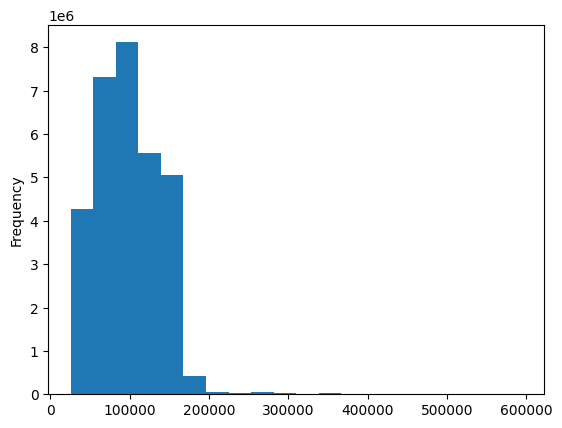

In [22]:
hist = df_high_act_customers['income'].plot.hist(bins = 20)

In [23]:
print(df.columns.tolist())

['order_id', 'user_id', 'order_number', 'order_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'product_name', 'aisle_id', 'department_id', 'prices', 'busiest_day', 'busiest_days_of_week', 'busiest_period_of_day', 'loyalty_flag', 'avg_order', 'spending_flag', 'Order_freq_flag', 'gender', 'state', 'age', 'date_joined', 'number_of_dependants', 'marital_status', 'income', '_merge', 'region', 'max_order', 'exclusion_flag']


### Profiling based on age

In [24]:
df_high_act_customers['age'].describe()

count    3.099349e+07
mean     4.946786e+01
std      1.848521e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

The maximum age of the customer is 81 years and the minimum is 18 years. The average age of customers is around 49 years. I'll group them in three categories before doing further analysis.  

In [25]:
# Categorising age groups in three groups
df_high_act_customers.loc[(df_high_act_customers['age'] < 40) & (df_high_act_customers['age'] >= 18), 'age_groups'] = 'Young'
df_high_act_customers.loc[(df_high_act_customers['age'] < 60) & (df_high_act_customers['age'] >= 40), 'age_groups'] = 'Middle aged'
df_high_act_customers.loc[(df_high_act_customers['age'] < 82) & (df_high_act_customers['age'] >= 60), 'age_groups'] = 'Seniors'

/tmp/ipykernel_2133/2481647527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_act_customers.loc[(df_high_act_customers['age'] < 40) & (df_high_act_customers['age'] >= 18), 'age_groups'] = 'Young'


In [26]:
df_high_act_customers['age_groups'].value_counts()

Young          10674971
Seniors        10584175
Middle aged     9734343
Name: age_groups, dtype: int64

In [27]:
# Deduce the number of customers based on age groups 
df_age_groups = df_high_act_customers.groupby(['age_groups']).agg({'user_id': ['nunique']}).reset_index()

In [28]:
df_age_groups.head()

,age_groups,user_id
,,nunique
0,Middle aged,51198
1,Seniors,55775
2,Young,55660


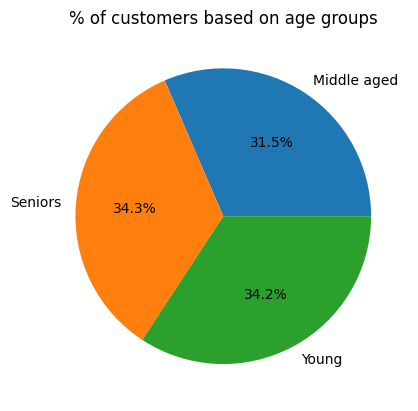

In [29]:
labels = 'Middle aged', 'Seniors', 'Young'
sizes = [51198, 55775, 55660]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('% of customers based on age groups')
plt.show()

The Seniors and Young people buy more compared to Middle aged people.

### Profiling based on number of dependants

In [30]:
df_high_act_customers['number_of_dependants'].value_counts()

3    7779638
0    7747183
2    7740539
1    7726129
Name: number_of_dependants, dtype: int64

In [31]:
df_high_act_customers.groupby(['age_groups', 'number_of_dependants']).agg({'number_of_dependants': ['count']})

number_of_dependants
                                                count
age_groups  number_of_dependants                     
Middle aged 0                                 2436349
            1                                 2478717
            2                                 2381161
            3                                 2438116
Seniors     0                                 2647799
            1                                 2585526
            2                                 2687046
            3                                 2663804
Young       0                                 2663035
            1                                 2661886
            2                                 2672332
            3                                 2677718

The above tables shows the frequency of the number of dependants of different age groups. There does not seem like a huge difference between people with no dependants versus people with dependants. Each age group has none or a maximum of three dependants. 

In [32]:
df_high_act_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,...,age,date_joined,number_of_dependants,marital_status,income,_merge,region,max_order,exclusion_flag,age_groups
0,40.0,382,29.0,1.0,15.0,23.0,10070,1.0,Organic 1% Low Fat Milk,84.0,...,21,7/28/2019,2,living with parents and siblings,87994,both,R1 - Northeast,29.0,high activity customers,Young
1,116744.0,382,23.0,4.0,17.0,8.0,10070,3.0,Organic 1% Low Fat Milk,84.0,...,21,7/28/2019,2,living with parents and siblings,87994,both,R1 - Northeast,29.0,high activity customers,Young
2,120295.0,382,27.0,0.0,8.0,13.0,10070,2.0,Organic 1% Low Fat Milk,84.0,...,21,7/28/2019,2,living with parents and siblings,87994,both,R1 - Northeast,29.0,high activity customers,Young
3,247775.0,382,14.0,2.0,15.0,8.0,10070,2.0,Organic 1% Low Fat Milk,84.0,...,21,7/28/2019,2,living with parents and siblings,87994,both,R1 - Northeast,29.0,high activity customers,Young
4,405284.0,382,15.0,1.0,11.0,6.0,10070,1.0,Organic 1% Low Fat Milk,84.0,...,21,7/28/2019,2,living with parents and siblings,87994,both,R1 - Northeast,29.0,high activity customers,Young


### Profiling based on order day of the week

In [33]:
df_high_act_customers.groupby(['age_groups', 'order_day_of_week']).agg({'order_day_of_week': ['count']})

order_day_of_week
                                          count
age_groups  order_day_of_week                  
Middle aged 0.0                         1853274
            1.0                         1697439
            2.0                         1275002
            3.0                         1149460
            4.0                         1136541
            5.0                         1264150
            6.0                         1358477
Seniors     0.0                         2017559
            1.0                         1836114
            2.0                         1375799
            3.0                         1262337
            4.0                         1237478
            5.0                         1381203
            6.0                         1473685
Young       0.0                         2043155
            1.0                         1883601
            2.0                         1377760
            3.0                         1261209
            4.0                         1254307
            5.0                         1392058
            6.0                         1462881

Saturday is a popular time to order, as the maximum count of the order day of the week is for Saturday across all age groups. Plus, Sunday is the second most popular time to order across all age groups. 

### Understanding which products are sold more on the most popular days of the week

In [34]:
df_high_act_customers.shape

(30993489, 31)

In [35]:
# Making a new column where the order day of the week is divided in three groups -Saturday, Sunday and the rest of the days
df_high_act_customers.loc[df_high_act_customers['order_day_of_week'] >= 2, 'Days'] = 'Weekdays'
df_high_act_customers.loc[df_high_act_customers['order_day_of_week'] == 1, 'Days'] = 'Sunday'

/tmp/ipykernel_2133/2257041285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_act_customers.loc[df_high_act_customers['order_day_of_week'] >= 2, 'Days'] = 'Weekdays'


In [36]:
df_high_act_customers.loc[df_high_act_customers['order_day_of_week'] == 0, 'Days'] = 'Saturday'

In [37]:
# Understanding the number of transactions on Saturday, Sunday and Weekday on a department level
df_temp = df_high_act_customers.groupby(['Days', 'department_id']).agg({'order_id': 'count'}).reset_index()

In [38]:
df_temp

,Days,department_id,order_id
0,Saturday,1.0,415950
1,Saturday,2.0,5751
2,Saturday,3.0,214438
3,Saturday,4.0,1865183
4,Saturday,5.0,16176
...,...,...,...
58,Weekdays,17.0,465639
59,Weekdays,18.0,260774
60,Weekdays,19.0,1788880
61,Weekdays,20.0,627795


In [39]:
df_temp = df_temp.sort_values(by = ['Days','order_id'], ascending=False)

In [40]:
# Number of products sold on Saturday according to department_id
df_temp[df_temp['Days']=='Saturday']

,Days,department_id,order_id
3,Saturday,4.0,1865183
15,Saturday,16.0,971292
18,Saturday,19.0,461049
0,Saturday,1.0,415950
6,Saturday,7.0,412091
12,Saturday,13.0,333468
14,Saturday,15.0,216023
2,Saturday,3.0,214438
19,Saturday,20.0,199582
8,Saturday,9.0,172536


In [41]:
df_temp[df_temp['Days']=='Sunday']

,Days,department_id,order_id
24,Sunday,4.0,1612409
36,Sunday,16.0,916406
39,Sunday,19.0,516477
27,Sunday,7.0,462953
21,Sunday,1.0,341966
33,Sunday,13.0,289903
23,Sunday,3.0,194647
40,Sunday,20.0,176457
35,Sunday,15.0,170213
29,Sunday,9.0,140174


In [42]:
# Import departments_wrangled 
df_dep = pd.read_csv('departments_wrangled.csv')

In [43]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


The top four orders on Saturday and Sunday were from department_id 4, 16, 19 and 7. These are categorized in produce, dairy eggs, snacks and beverages.

### Finding out the most popular products sold on the weekend under department_id = 4 (produce)

In [44]:
# Creating a dataframe which inlcudes products of produce which is equivalent to department_id = 4, bought on the weekend
df_dep_4 = df_high_act_customers.loc[(df_high_act_customers['department_id'] == 4) & (df_high_act_customers['Days'] != 'Weekdays')]

In [45]:
# Understanging the total number of different types of produce bought over the weekend
df_dep_4['product_name'].value_counts()

Banana                                                           176497
Bag of Organic Bananas                                           136045
Organic Strawberries                                              96698
Organic Baby Spinach                                              92916
Organic Hass Avocado                                              79795
                                                                  ...  
Organic Green Chickpeas Chipotle, Black Beans Sweet Corn Meal         1
Organic Tomato On The Vine                                            1
Orange Grape Tomato                                                   1
Yellow Cherry Tomato                                                  1
Ruby Grapefruit                                                       1
Name: product_name, Length: 1672, dtype: int64

Bananas, organic bananas and organic strawberries are the three most bought items over the weekend. 

### Finding out the most popular products sold on the weekend under department_id = 16 (dairy eggs)

In [46]:
# Creating a dataframe which inlcudes types of dairy eggs which is equivalent to department_id = 16, bought on the weekend
df_dep_16 = df_high_act_customers.loc[(df_high_act_customers['department_id'] == 16) & (df_high_act_customers['Days'] != 'Weekdays')]

In [47]:
# Understanging the total number of different types of items bought over the weekend
df_dep_16['product_name'].value_counts()

Organic Whole Milk                                              47852
Organic Half & Half                                             26393
Half & Half                                                     24033
Organic Whole String Cheese                                     23184
Organic Unsweetened Almond Milk                                 20883
                                                                ...  
String Cheese Mozzarella                                            1
New York Extra Sharp Yellow Cheddar                                 1
Tomato Basil Gouda                                                  1
Non-Alcoholic White Chocolate Peppermint Bark Coffee Creamer        1
Caramel Macchiato                                                   1
Name: product_name, Length: 3404, dtype: int64

Organic whole milk, 'organic half & half' and 'half & half' are the top three household items sold over the weekend. While the second and third item names are unclear, I think they both refer to types of milk. 

### Finding out the most popular products sold on the weekend under department_id = 19 (snacks)

In [48]:
# Creating a dataframe which inlcudes snacks which is equivalent to department_id = 19, bought on the weekend
df_dep_19 = df_high_act_customers.loc[(df_high_act_customers['department_id'] == 19) & (df_high_act_customers['Days'] != 'Weekdays')]

In [49]:
# Understanging the total number of different types of beverages bought over the weekend
df_dep_19['product_name'].value_counts()

Lightly Salted Baked Snap Pea Crisps                   8939
Original Veggie Straws                                 6240
Pretzel Crisps Original Deli Style Pretzel Crackers    5781
Sea Salt Pita Chips                                    5774
Baked Aged White Cheddar Rice and Corn Puffs           5092
                                                       ... 
Organic 54% Cocoa Dark Chocolate Bar                      1
Tamari Brown Rice Crackers                                1
Chocolate Chip Organic                                    1
Tortilla Chips Blue Corn                                  1
Truffles, Organic, Kickin' Cayenne                        1
Name: product_name, Length: 6086, dtype: int64

Lightly Salted Baked Snap Pea Crisps, original veggie straws and Pretzel Crisps Original Deli Style Pretzel Crackers are the top three snacks that are bought on the weekend. 


### Finding out the most popular products sold on the weekend under department_id = 7 (beverages)

In [50]:
# Creating a dataframe which inlcudes products of beverages which is equivalent to department_id = 7, bought on the weekend
df_dep_7 = df_high_act_customers.loc[(df_high_act_customers['department_id'] == 7) & (df_high_act_customers['Days'] != 'Weekdays')]

In [51]:
# Understanging the total number of different types of beverages bought over the weekend
df_dep_7['product_name'].value_counts()

Sparkling Water Grapefruit                                       27726
Spring Water                                                     17833
Lime Sparkling Water                                             16600
Sparkling Natural Mineral Water                                  13694
100% Raw Coconut Water                                           12836
                                                                 ...  
Acai 100 Mango Passion Fruit Acai Berry Superfood Juice Blend        1
Warriors Grounds Dark Roast Ground Coffee                            1
Red Raspberry Herbal Tea                                             1
Blood Orange Cocktail Mixer                                          1
Frappuccino S'mores Chilled Coffee Drink                             1
Name: product_name, Length: 4243, dtype: int64

Sparkling water grapefruit, spring water and lime sparkling water are the most popular beverages bought over the weekend. 

### Comparing customer profiles with regions and departments

In [52]:
df_region_spending = pd.crosstab(df_high_act_customers.region, df_high_act_customers.spending_flag)

In [53]:
df_region_spending

spending_flag,High spender,Low spender
region,,
R1 - Northeast,91348,4784041
R2 - Midwest,148784,7119118
R3 - South,199511,10121320
R4 - West,152371,7782221


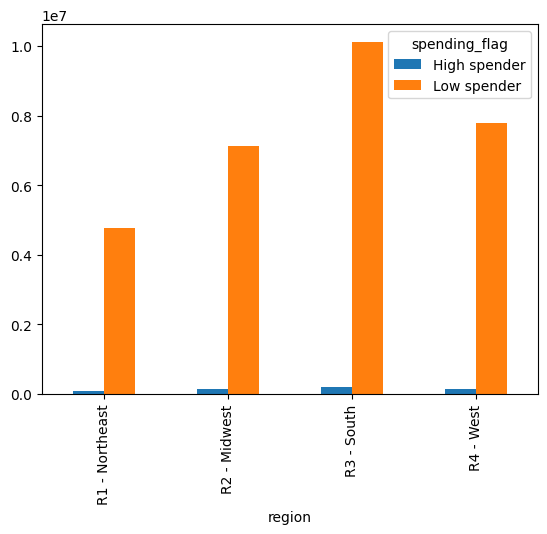

In [54]:
bar_region_spending = df_region_spending.plot(kind="bar")

In [55]:
# Saving bar_region_spending graph
bar_region_spending.figure.savefig('bar_region_spending.png')

Before analyzing spending patterns in different regions, I would like to clarify that if the mean of the prices of products purchased by a user is lower than 10, then they are flagged as a “Low spender" and if the mean of the prices of products purchased are more than 10, they are considered as "High spender". 

Region 3, which is the South, has more spenders - both high and low, than any other region of the US. The low spenders in all regions make up the major chunk of the customers but the South region has the most customers. 

This bar graph shows that people in general spend considerably more on products whose mean price is less than 10.

In [56]:
df_region_department = pd.crosstab(df_high_act_customers.department_id, df_high_act_customers.region)

In [57]:
df_region_department

region,R1 - Northeast,R2 - Midwest,R3 - South,R4 - West
department_id,,,,
1.0,330049,498225,709907,543164
2.0,5626,7983,11579,8581
3.0,177119,261753,371620,288155
4.0,1419787,2134116,3027478,2324678
5.0,22351,34043,48813,36754
6.0,39796,60666,84649,65998
7.0,410771,598979,859419,650574
8.0,15706,21358,29909,24059
9.0,127914,193463,272813,212043


In [58]:
df_region_department.describe()

region,R1 - Northeast,R2 - Midwest,R3 - South,R4 - West
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,2.319262e+05,3.457864e+05,4.910069e+05,3.774870e+05
std,3.349260e+05,5.016510e+05,7.122645e+05,5.472350e+05
min,5.061000e+03,7.929000e+03,1.118000e+04,8.581000e+03
25%,3.979600e+04,6.066600e+04,8.464900e+04,6.599800e+04
50%,1.117420e+05,1.669920e+05,2.300620e+05,1.782000e+05
75%,2.790960e+05,4.203340e+05,5.917540e+05,4.578860e+05
max,1.419787e+06,2.134116e+06,3.027478e+06,2.324678e+06


In all regions, customers shopped most for products that were in department id 4, which is the 'produce' category. The customers in Northeast, Midwest and South region shopped the least from department id 10 which is the 'bulk' category. However, customers in the West region shopped least from department id 2, which is the 'other' category.

## Summarizing findings and analysis

- Most of the high spenders and low spenders are in Region 3 which is the South of the US.
- Exclusion flag was created for low-activity customers (customers with less than 5 orders) and they were excluded from the data.
- Customer profiling done with only high activity customers. 
- The major proportion of customers are married, while the ones who are living with parents or siblings are the lowest in number.
- The mean income of the customers is $ 99673. 
- The customers were grouped for further analysis according to their age in three groups - young, middle age and seniors. 
- The seniors and young people buy more compared to middle aged people.
- There is not a significant difference of ordering products between people with dependents versus people with no dependents. 
- Saturday and Sunday are the most popular time to order across all age groups. 
- Top four orders on the weekend were from departments of produce, dairy eggs, snacks and beverages.
- The most popular three products within these four departments were searched. 
- The low spenders in all regions make up the major chunk of the customers but the South region has the most customers. 
- People generally from all regions of the US spend considerably more on products whose mean price is less than 10.